# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

In [3]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [4]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [5]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [6]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

#### Iniciemos con una red básica para ir creando familiaridad con las arquitecturas, conceptos y parámetros


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Crear el modelo
model = Sequential()

# Capas convolucionales y de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Aplanar y añadir capas completamente conectadas
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Regularización
model.add(Dense(num_classes, activation='softmax'))  # Capa de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-04 19:52:55.662184: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
# Entrenamiento de la red
# Entrenar el modelo
history = model.fit(
    x_train, y_train_one_hot,
    epochs=20,
    batch_size=64,
    validation_data=(x_valid, y_valid_one_hot)
)



2024-11-04 19:53:52.109016: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/20
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2374 - loss: 2.0158

2024-11-04 19:54:26.022043: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.2376 - loss: 2.0151 - val_accuracy: 0.4992 - val_loss: 1.4193
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.4641 - loss: 1.4932 - val_accuracy: 0.5460 - val_loss: 1.2987
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 50ms/step - accuracy: 0.5125 - loss: 1.3410 - val_accuracy: 0.5620 - val_loss: 1.2224
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 53ms/step - accuracy: 0.5558 - loss: 1.2610 - val_accuracy: 0.6182 - val_loss: 1.0879
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 58ms/step - accuracy: 0.5848 - loss: 1.1697 - val_accuracy: 0.6412 - val_loss: 1.0124
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.6096 - loss: 1.1058 - val_accuracy: 0.6407 - val_loss: 1.0186
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.6296 - loss: 1.0699 - val_accuracy: 0.6469 - val_loss: 0.9810
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.6466 - loss: 1.0143 - val_accurac

In [9]:

test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.4f}")


  7/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7417 - loss: 0.8108  

2024-11-04 20:07:59.229058: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7082 - loss: 0.9034
Precisión en el conjunto de prueba: 0.7074


#### Matriz de Confusión y Métricas por Clase


In [10]:

import numpy as np

# Predicciones del modelo en el conjunto de prueba
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convierte las probabilidades en etiquetas
y_true = np.squeeze(y_test)  # Convierte las etiquetas verdaderas a una dimensión compatible


2024-11-04 20:11:13.146324: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


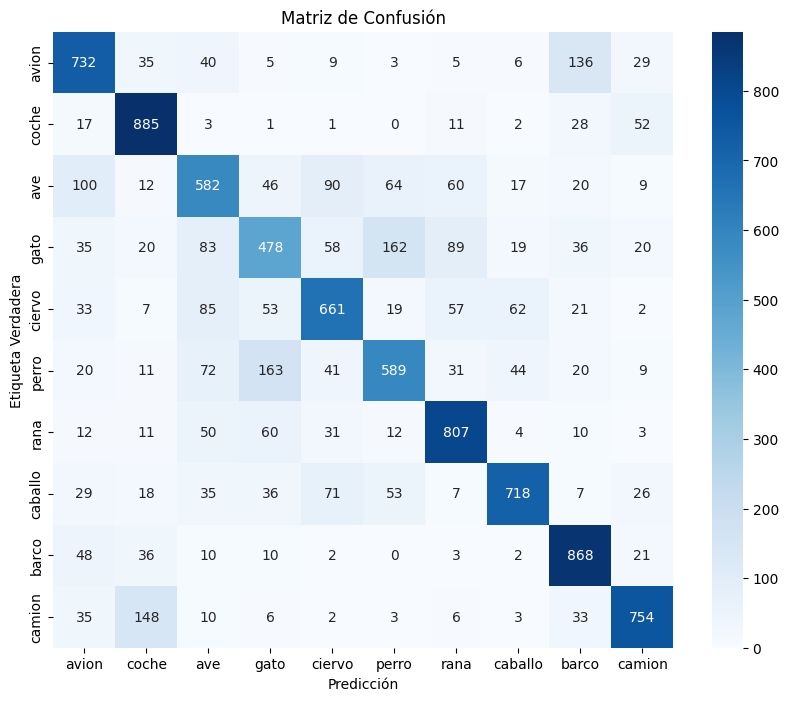

In [12]:
# Matriz de confusión

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=MAP_ELEMENTS.values(), yticklabels=MAP_ELEMENTS.values())
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión")
plt.show()



## Observaciones de la Matriz de Confusión

### Clases con Buen Rendimiento
El modelo tiene buen rendimiento en clases como **coche** (885), **rana** (807), **barco** (868) y **camión** (754), lo que indica que capta bien sus características distintivas.

### Clases con Dificultades
Las clases de **ave** y **gato** presentan confusiones frecuentes, especialmente con **ciervo** y **perro**. Esto sugiere dificultad para diferenciar animales con patrones visuales similares.

### Errores Interesantes
Existen confusiones interesantes, como entre **avión** y **camión** (136 casos) y entre **caballo** con **gato** y **ciervo**, lo cual indica que el modelo tiene problemas para distinguir ciertas formas y contextos visuales.

## Sugerencias de Mejora

### Data Augmentation
Aumentar la variedad de datos mediante técnicas como rotaciones, zoom, entre otras, podría ayudar a mejorar la distinción entre clases similares.

### Ajustes de Arquitectura
Incrementar la profundidad o el número de filtros de la red permitirá al modelo aprender características más complejas.

### Regularización
Implementar técnicas de **Batch Normalization** y **Dropout** adicionales puede reducir el sobreajuste y mejorar la generalización del modelo.



In [13]:
# Reporte de clasificación
class_report = classification_report(y_true, y_pred_classes, target_names=MAP_ELEMENTS.values())
print(class_report)


              precision    recall  f1-score   support

       avion       0.69      0.73      0.71      1000
       coche       0.75      0.89      0.81      1000
         ave       0.60      0.58      0.59      1000
        gato       0.56      0.48      0.51      1000
      ciervo       0.68      0.66      0.67      1000
       perro       0.65      0.59      0.62      1000
        rana       0.75      0.81      0.78      1000
     caballo       0.82      0.72      0.77      1000
       barco       0.74      0.87      0.80      1000
      camion       0.82      0.75      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [ ]:
# Encuentra los índices de las imágenes donde el modelo falló
misclassified_indices = np.where(y_pred_classes != y_true)[0]

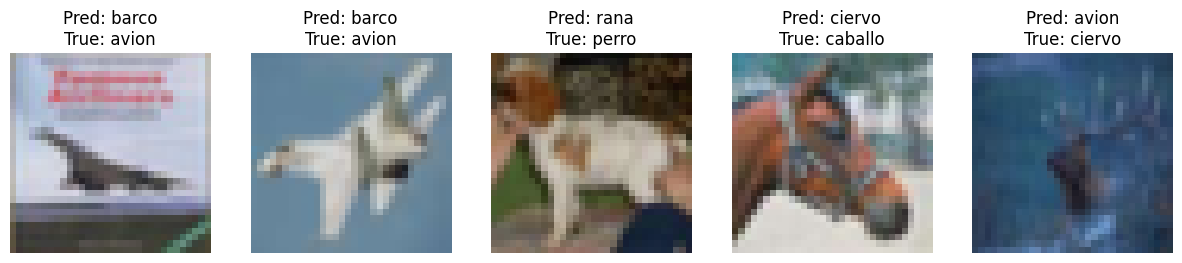

In [15]:

num_images = 5  # Número de imágenes a mostrar
plt.figure(figsize=(15, 15))
for i, index in enumerate(misclassified_indices[:num_images]):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Pred: {MAP_ELEMENTS[y_pred_classes[index]]}\nTrue: {MAP_ELEMENTS[y_true[index]]}")
    plt.axis('off')
plt.show()


#### Iniciemos con la recomendación de mejora: 'Data Augmentation'


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración del generador de imágenes con data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotación aleatoria de hasta 20 grados
    width_shift_range=0.1,  # Desplazamiento horizontal del 10%
    height_shift_range=0.1, # Desplazamiento vertical del 10%
    shear_range=0.1,        # Aplicación de cizallamiento
    zoom_range=0.1,         # Zoom aleatorio de hasta el 10%
    horizontal_flip=True,   # Voltear horizontalmente las imágenes
    fill_mode='nearest'     # Cómo rellenar los píxeles fuera de la imagen
)


#### Entrenar el Modelo usando Data Augmentation

En lugar de pasar directamente el conjunto de datos de entrenamiento al modelo, ahora usaremos el generador de imágenes. Esto permite al modelo ver una nueva versión alterada de cada imagen en cada época, haciendo el entrenamiento más robusto.


In [17]:
# Redefinimos el tamaño del lote y el número de épocas
batch_size = 64
epochs = 20

# Ajustar el generador al conjunto de datos de entrenamiento
datagen.fit(x_train)

# Entrenar el modelo usando el generador
history = model.fit(
    datagen.flow(x_train, y_train_one_hot, batch_size=batch_size),
    validation_data=(x_valid, y_valid_one_hot),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs
)



/media/luis/679bf4c6-b08e-405f-bf66-a325930f4245/2024/1. Maestria_UNIR_AI/2.Semestre 2/Redes neuronales/Actividades/Actividad 2/muinar06_act2_individual/cnn/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6047 - loss: 1.1585

2024-11-04 20:29:07.032917: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 69ms/step - accuracy: 0.6047 - loss: 1.1585 - val_accuracy: 0.6655 - val_loss: 0.9990
Epoch 2/20


2024-11-04 20:29:09.365779: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6655 - val_loss: 0.9990
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 66ms/step - accuracy: 0.6191 - loss: 1.1065 - val_accuracy: 0.7161 - val_loss: 0.8292
Epoch 4/20


2024-11-04 20:30:28.999929: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7161 - val_loss: 0.8292
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6276 - loss: 1.0868 - val_accuracy: 0.7099 - val_loss: 0.8582
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7099 - val_loss: 0.8582
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.6368 - loss: 1.0683 - val_accuracy: 0.7182 - val_loss: 0.8466
Epoch 8/20


2024-11-04 20:31:55.184995: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7182 - val_loss: 0.8466
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6486 - loss: 1.0320 - val_accuracy: 0.7059 - val_loss: 0.8774
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7059 - val_loss: 0.8774
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.6474 - loss: 1.0279 - val_accuracy: 0.7067 - val_loss: 0.8635
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7067 - val_loss: 0.8635
Epoch 13/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.6468 - loss: 1.0338 - val_accuracy: 0.7021 - val_loss: 0.8901
Epoch 14/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7021 - val_loss: 0.8901
Epoch 15/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.658

2024-11-04 20:36:06.022125: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6799 - val_loss: 0.9545
Epoch 17/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6583 - loss: 1.0052 - val_accuracy: 0.7361 - val_loss: 0.7642
Epoch 18/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7361 - val_loss: 0.7642
Epoch 19/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.6568 - loss: 1.0037 - val_accuracy: 0.7196 - val_loss: 0.8190
Epoch 20/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7196 - val_loss: 0.8190
